<br>

###   <font color="Coral">hw7pr2digits_modeler</font>
+ digits clasification -- and regression -- via NNets

Feel free to re-use your previous digits_cleaned.csv file 


### First, use the iris example to create a digit-predicting NNet

This is similar to the past two digits challenges, hw5 and hw6

**However**, because we're using NNets, you'll need to
+ create TEN categorical variables. You can use just one ``get_dummies`` pandas call
+ use a SCALER to make sure the network can, in a fair way, "hear" all of the inputs 

In [2]:
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import matplotlib.pyplot as plt

In [3]:
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [4]:
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()
df_tidy.head()

df_tidy.shape is (1768, 65)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2


In [7]:
df_tidy_cat = pd.get_dummies(data=df_tidy, prefix="is", columns=['actual_digit'])
print(df_tidy_cat.head())

   pix0  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...   is_0  \
0     0     0     9    14     8     1     0     0     0     0  ...  False   
1     0     0    11    12     0     0     0     0     0     2  ...  False   
2     0     0     1     9    15    11     0     0     0     0  ...   True   
3     0     0     0     0    14    13     1     0     0     0  ...  False   
4     0     0     5    12     1     0     0     0     0     0  ...  False   

    is_1   is_2   is_3   is_4   is_5   is_6   is_7   is_8   is_9  
0  False  False  False  False  False  False  False   True  False  
1  False  False  False  False  False  False  False  False   True  
2  False  False  False  False  False  False  False  False  False  
3   True  False  False  False  False  False  False  False  False  
4  False   True  False  False  False  False  False  False  False  

[5 rows x 74 columns]


In [8]:
df_model1 = df_tidy_cat.copy()
df_model1.head()

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,is_9
0,0,0,9,14,8,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,11,12,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,False,True
2,0,0,1,9,15,11,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
3,0,0,0,0,14,13,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,0,0,5,12,1,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [9]:
COLUMNS = df_model1.columns          
print(f"COLUMNS is {COLUMNS}\n")  

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63', 'is_0',
       'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9'],
      dtype='object')



In [10]:
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  
print(f"COL_INDEX is {COL_INDEX}\n\n")

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25': 25, 'pix26': 26, 'pix27': 27, 'pix28': 28, 'pix29': 29, 'pix30': 30, 'pix31': 31, 'pix32': 32, 'pix33': 33, 'pix34': 34, 'pix35': 35, 'pix36': 36, 'pix37': 37, 'pix38': 38, 'pix39': 39, 'pix40': 40, 'pix41': 41, 'pix42': 42, 'pix43': 43, 'pix44': 44, 'pix45': 45, 'pix46': 46, 'pix47': 47, 'pix48': 48, 'pix49': 49, 'pix50': 50, 'pix51': 51, 'pix52': 52, 'pix53': 53, 'pix54': 54, 'pix55': 55, 'pix56': 56, 'pix57': 57, 'pix58': 58, 'pix59': 59, 'pix60': 60, 'pix61': 61, 'pix62': 62, 'pix63': 63, 'is_0': 64, 'is_1': 65, 'is_2': 66, 'is_3': 67, 'is_4': 68, 'is_5': 69, 'is_6': 70, 'is_7': 71, 'is_8': 72, 'is_9': 73}




In [11]:
DIGITS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']   # int to str
DIGITS_INDEX = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9}  # str to int


In [12]:
for name in DIGITS:
    print(f"Digit {name} maps to {DIGITS_INDEX[name]}")

Digit 0 maps to 0
Digit 1 maps to 1
Digit 2 maps to 2
Digit 3 maps to 3
Digit 4 maps to 4
Digit 5 maps to 5
Digit 6 maps to 6
Digit 7 maps to 7
Digit 8 maps to 8
Digit 9 maps to 9


In [13]:
A = df_model1.to_numpy()   
A = A.astype('float64')
print("\nFirst few rows of array A:")
print(A[:5,:])


First few rows of array A:
[[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 1

In [14]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 74 cols


In [15]:
n = 42  
print(f"digit #{n} is {A[n]}")

digit #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.]


In [16]:
pixel_cols = [col for col in COL_INDEX.keys() if col.startswith('pix')]
label_cols = [col for col in COL_INDEX.keys() if col.startswith('is_')]

In [17]:
pixel_indices = [COL_INDEX[col] for col in pixel_cols]
label_indices = [COL_INDEX[col] for col in label_cols]

In [19]:
X_all = A[:, pixel_indices]   
y_all = A[:, label_indices]   

print(f"y_all (just the labels/digits, first few rows) are \n {y_all[0:5]}")
print()
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

y_all (just the labels/digits, first few rows) are 
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0. 

In [20]:
indices = np.random.permutation(len(y_all))  # indices is a permutation-list
X_all = X_all[indices]              # apply the same permutation to each
y_all = y_all[indices]              # again...

print(f"The scrambled labels/digits are \n {y_all[0:5]}")
print()
print(f"The corresponding data rows are \n {X_all[0:5]}")


The scrambled labels/digits are 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

The corresponding data rows are 
 [[ 0.  3. 16. 13. 15. 16. 11.  0.  0.  5. 16. 14. 12.  8. 10.  0.  0.  2.
  16. 12.  0.  0.  0.  0.  0.  0.  7. 16. 12.  0.  0.  0.  0.  0.  0.  7.
  16.  8.  0.  0.  0.  0.  0.  0. 13. 11.  0.  0.  0.  3.  6.  8. 16.  7.
   0.  0.  0.  2. 15. 15.  9.  0.  0.  0.]
 [ 0.  1. 11. 16. 16. 12.  0.  0.  0.  8. 16. 13. 16. 16.  3.  0.  0.  1.
   5.  7. 16. 14.  0.  0.  0.  0.  0. 11. 16.  4.  0.  0.  0.  0.  0.  2.
  15.  9.  0.  0.  0.  0.  0.  0. 11. 13.  0.  0.  0.  0.  3.  7. 15. 14.
   0.  0.  0.  0. 14. 16. 16.  6.  0.  0.]
 [ 0.  0.  2. 13.  8.  6.  0.  0.  0.  0.  7. 14. 14. 16.  0.  0.  0.  0.
   7.  9.  3. 16.  4.  0.  0.  0.  5. 14. 15. 16.  4.  0.  0.  0.  0.  3.
   2. 13.  5.  0.  0.  0.  3.  0.  0. 12.  6.  0.  0.  1. 12.  6.  0. 11.
   7.  0.  0.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n")
print(f"+++ Testing +++   Held-out data... (testing data: {len(y_test)})\n")
print(f"y_test: {y_test[0:5,:]}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")
print("\n")
print(f"+++ Training +++   Data used for modeling... (training data: {len(y_train)})\n")
print(f"y_train: {y_train[0:5,:]}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")

training with 1414 rows;  testing with 354 rows

+++ Testing +++   Held-out data... (testing data: 354)

y_test: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

X_test (few rows): [[ 0.  0.  0.  0.  9. 16.  4.  0.  0.  0.  0.  5. 15. 16.  2.  0.  0.  3.
  12. 16. 16. 14.  0.  0.  0. 10. 16. 15. 16. 15.  0.  0.  0.  1.  4.  0.
  16. 13.  0.  0.  0.  0.  0.  0. 15. 13.  0.  0.  0.  0.  0.  0. 12. 16.
  12.  0.  0.  0.  0.  0. 12. 16.  6.  0.]
 [ 0.  0.  1. 11. 12.  9.  5.  0.  0.  0. 14.  6.  1. 15. 10.  0.  0.  2.
  12.  4. 12.  7. 10.  0.  0.  1. 13. 12.  3.  4.  8.  0.  0.  0.  0.  0.
   0.  4.  8.  0.  0.  0.  3.  4.  0.  7.  6.  0.  0.  0. 12.  7.  3. 11.
   0.  0.  0.  0.  3. 13. 15.  3.  0.  0.]
 [ 0.  0.  6. 16. 16. 16. 16. 10.  0.  0.  6. 10.  8. 14. 16.  3.  0.  0.
   0.  0.  4. 16.  8.  0.  0.  0.  2. 10. 14. 15.  6.  0.  0.  0.  6. 16.
  16. 16.  7.  0.  0.  

In [22]:
from sklearn.preprocessing import StandardScaler

USE_SCALER = True

if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)
else:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False)
    scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()


In [23]:
def ascii_table(X, y, scaler_to_invert=None):
    """ print a table of inputs and outputs """
    np.set_printoptions(precision=2)  # Let's use less precision
    if scaler_to_invert == None:  # don't use the scaler
        X = X
    else:
        X = scaler_to_invert.inverse_transform(X)
    print(f"{'input ':>58s} -> {'pred':^7s} {'des':<5s}")
    for i in range(min(5, len(y))):  # Show only first 5 to avoid large output
        print(f"{str(X[i,0:5]):>58s} -> {'?':^7s} {str(y[i][0:3]):<21s}")
    print()

In [24]:
ascii_table(X_train_scaled[0:5,:], y_train_scaled[0:5], None)
ascii_table(X_train_scaled[0:5,:], y_train_scaled[0:5], scaler_to_invert=scaler)

                                                    input  ->  pred   des  
                           [ 0.   -0.34 -1.11 -1.19  0.49] ->    ?    [0. 0. 0.]           
                           [ 0.   -0.34  1.65  0.49 -0.67] ->    ?    [0. 0. 0.]           
                           [ 0.   -0.34 -1.11 -2.38  0.49] ->    ?    [0. 0. 0.]           
                           [ 0.   -0.34 -0.47  0.97  0.49] ->    ?    [0. 0. 0.]           
                           [ 0.   -0.34 -0.68 -0.95 -0.91] ->    ?    [0. 0. 0.]           

                                                    input  ->  pred   des  
                                     [ 0.  0.  0.  7. 14.] ->    ?    [0. 0. 0.]           
                                     [ 0.  0. 13. 14.  9.] ->    ?    [0. 0. 0.]           
                                     [ 0.  0.  0.  2. 14.] ->    ?    [0. 0. 0.]           
                                     [ 0.  0.  3. 16. 14.] ->    ?    [0. 0. 0.]           
                   

In [26]:
from sklearn.neural_network import MLPClassifier


nn_classifier = MLPClassifier(hidden_layer_sizes=(32, 16),  
                    max_iter=500,
                    verbose=True,
                    shuffle=True,
                    random_state=42,
                    learning_rate_init=.05,
                    learning_rate='adaptive')

In [27]:

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_classifier.fit(X_train_scaled, y_train_scaled)
print("\n++++++++++  TRAINING:   end  +++++++++++++++")
print(f"The analog prediction error (the loss) is {nn_classifier.loss_}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 3.29901564
Iteration 2, loss = 1.07446054
Iteration 3, loss = 0.58745704
Iteration 4, loss = 0.38896715
Iteration 5, loss = 0.22211644
Iteration 6, loss = 0.15144603
Iteration 7, loss = 0.12559815
Iteration 8, loss = 0.09172699
Iteration 9, loss = 0.08031038
Iteration 10, loss = 0.05909930
Iteration 11, loss = 0.04251906
Iteration 12, loss = 0.02948448
Iteration 13, loss = 0.03199444
Iteration 14, loss = 0.02698017
Iteration 15, loss = 0.01896646
Iteration 16, loss = 0.00906382
Iteration 17, loss = 0.00811109
Iteration 18, loss = 0.00604596
Iteration 19, loss = 0.00511778
Iteration 20, loss = 0.00427337
Iteration 21, loss = 0.00368608
Iteration 22, loss = 0.00344976
Iteration 23, loss = 0.00318829
Iteration 24, loss = 0.00341398
Iteration 25, loss = 0.00245037
Iteration 26, loss = 0.00211150
Iteration 27, loss = 0.00178496
Iteration 28, loss = 0.00161098
Iteration 29, loss = 0.00147418
Iteration 30, loss = 0.00137346

In [28]:
def get_digit(A):
    """ returns the digit for A ~ [1 0 0 0 0 0 0 0 0 0] or [0 1 0 0 0 0 0 0 0 0] or ... """
    for i in range(len(DIGITS)):
        if A[i] == 1: 
            return DIGITS[i]  
    return "no digit" 

In [31]:
def ascii_table_for_classifier(Xsc, y, nn, scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc)            # all predictions
    prediction_probs = nn.predict_proba(Xsc) # all prediction probabilities
    Xpr = scaler.inverse_transform(Xsc)      # Xpr is the "X to print": the unscaled data
    # count correct
    num_correct = 0
    # printing
    print(f"{'input ':>28s} -> {'pred':^12s} {'des.':^12s}")
    for i in range(min(20, len(y))):  # Show only first 20 to avoid large output
        pred = predictions[i]
        desired = y[i].astype(int)
        pred_digit = get_digit(pred)
        des_digit = get_digit(desired)
        if pred_digit != des_digit: 
            result = "  incorrect"
        else: 
            result = "  correct" 
            num_correct += 1
        print(f"{i:>3}: [...] -> {pred_digit:^12s} {des_digit:12s} {result:^10s}")
    print(f"\ncorrect predictions: {num_correct} out of {min(20, len(y))}")

In [33]:
# Function to visualize the testing results
def ascii_table_for_classifier(Xsc, y, nn, scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc)            # all predictions
    prediction_probs = nn.predict_proba(Xsc) # all prediction probabilities
    Xpr = scaler.inverse_transform(Xsc)      # Xpr is the "X to print": the unscaled data
    # count correct
    num_correct = 0
    # printing
    print(f"{'input ':>28s} -> {'pred':^12s} {'des.':^12s}")
    for i in range(min(20, len(y))):  # Show only first 20 to avoid large output
        pred = predictions[i]
        desired = y[i].astype(int)
        pred_digit = get_digit(pred)
        des_digit = get_digit(desired)
        if pred_digit != des_digit: 
            result = "  incorrect"
        else: 
            result = "  correct" 
            num_correct += 1
        print(f"{i:>3}: [...] -> {pred_digit:^12s} {des_digit:12s} {result:^10s}")
    print(f"\ncorrect predictions: {num_correct} out of {min(20, len(y))}")
    
    # Calculate overall accuracy
    all_preds = nn.predict(Xsc)
    all_correct = 0
    for i in range(len(y)):
        pred = all_preds[i]
        desired = y[i].astype(int)
        if get_digit(pred) == get_digit(desired):
            all_correct += 1
    print(f"Overall accuracy: {all_correct/len(y)*100:.2f}%")


In [34]:
print("\nTesting results:")
ascii_table_for_classifier(X_test_scaled, y_test_scaled, nn_classifier, scaler)


Testing results:
                      input  ->     pred         des.    
  0: [...] ->      1       1              correct 
  1: [...] ->   no digit   9              incorrect
  2: [...] ->      7       7              correct 
  3: [...] ->      7       7              correct 
  4: [...] ->      2       2              correct 
  5: [...] ->      5       5              correct 
  6: [...] ->      6       6              correct 
  7: [...] ->      2       2              correct 
  8: [...] ->      7       7              correct 
  9: [...] ->      8       8              correct 
 10: [...] ->      7       7              correct 
 11: [...] ->      1       1              correct 
 12: [...] ->      0       0              correct 
 13: [...] ->      2       2              correct 
 14: [...] ->      6       6              correct 
 15: [...] ->      4       4              correct 
 16: [...] ->      6       6              correct 
 17: [...] ->      3       3              correct 
 18: 

In [35]:
def predictive_model(Features, MODEL, SCALER):
    """ input: a list of 64 pixel features
        output: the predicted digit, from 0-9
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    scaled_features = SCALER.transform(our_features)      # we have to scale the features into "scaled space"
    predicted_cat = MODEL.predict(scaled_features)        # then, the nnet can predict our "cat" variables
    prediction_probs = MODEL.predict_proba(scaled_features) # all prediction probabilities
    predicted_digit = get_digit(predicted_cat[0])         # get the digit name
    return predicted_digit, prediction_probs


Testing the digits from the assignment:
Digit 0: I predict 4


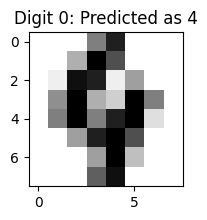

Digit 1: I predict 2


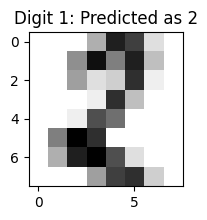

Digit 2: I predict 4


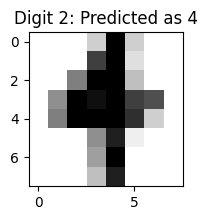

Digit 3: I predict 2


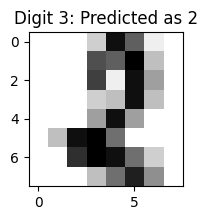

Digit 4: I predict 4


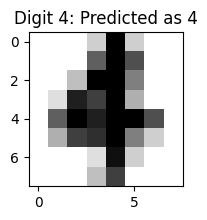

Digit 5: I predict 2


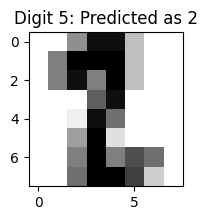

In [36]:
LoD = [
    [0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
    [0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
    [0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
    [0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
    [0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
    [0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]
]

# Run prediction on each test digit
print("\nTesting the digits from the assignment:")
for i, digit_features in enumerate(LoD):
    MODEL = nn_classifier
    SCALER = scaler
    name, probs = predictive_model(digit_features, MODEL, SCALER)
    print(f"Digit {i}: I predict {name}")
    
    # Visualize the digit
    digit_image = np.array(digit_features).reshape(8, 8)
    plt.figure(figsize=(2, 2))
    plt.imshow(digit_image, cmap='gray_r')
    plt.title(f"Digit {i}: Predicted as {name}")
    plt.show()


### Second, from the iris example create a _pixel-predicting_ &nbsp; NNet

Choose a pixel to predict!
+ It _can_ be #42 -- or choose another one?!
+ This will be _regression_, not classification
+ It will show off NNets' ability to generate or "hallucinate" pixels/digits/images/etc.!
+ The _digit dreaming_ problem will extend this further...

In [37]:
pixel_to_predict = 'pix42'
pixel_to_predict_idx = COL_INDEX[pixel_to_predict]

In [38]:
reg_y_all = A[:, pixel_to_predict_idx]


In [39]:
other_pixel_indices = [COL_INDEX[col] for col in pixel_cols if col != pixel_to_predict]
feature_indices = other_pixel_indices + label_indices


In [40]:
reg_X_all = A[:, feature_indices]

print(f"Regression y_all (pixel {pixel_to_predict} values) shape: {reg_y_all.shape}")
print(f"Regression X_all (other features) shape: {reg_X_all.shape}")

Regression y_all (pixel pix42 values) shape: (1768,)
Regression X_all (other features) shape: (1768, 73)


In [41]:
indices = np.random.permutation(len(reg_y_all))
reg_X_all = reg_X_all[indices]
reg_y_all = reg_y_all[indices]

In [42]:
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X_all, reg_y_all, test_size=0.2)

print(f"Regression training with {len(reg_y_train)} rows; testing with {len(reg_y_test)} rows\n")

Regression training with 1414 rows; testing with 354 rows



In [43]:
reg_scaler = StandardScaler()
reg_scaler.fit(reg_X_train)

reg_X_train_scaled = reg_scaler.transform(reg_X_train)
reg_X_test_scaled = reg_scaler.transform(reg_X_test)

In [44]:
from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(32, 16),
                     max_iter=500,
                     verbose=True,
                     shuffle=True,
                     random_state=42,
                     learning_rate_init=.05,
                     learning_rate='adaptive')

In [45]:
print("\n\n++++++++++  REGRESSION TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(reg_X_train_scaled, reg_y_train)
print("\n++++++++++  REGRESSION TRAINING:   end  +++++++++++++++")
print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_:<6.3f}")
print(f"And, its square root:         {nn_regressor.loss_ ** 0.5:<6.3f}")
print()



++++++++++  REGRESSION TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 23.02388596
Iteration 2, loss = 7.47505597
Iteration 3, loss = 4.82243132
Iteration 4, loss = 3.82432824
Iteration 5, loss = 3.25175743
Iteration 6, loss = 2.65492236
Iteration 7, loss = 2.37316983
Iteration 8, loss = 2.11888263
Iteration 9, loss = 1.98049566
Iteration 10, loss = 1.88873344
Iteration 11, loss = 1.88180669
Iteration 12, loss = 1.92839438
Iteration 13, loss = 1.67918468
Iteration 14, loss = 1.51991080
Iteration 15, loss = 1.47143135
Iteration 16, loss = 1.56951850
Iteration 17, loss = 1.85926039
Iteration 18, loss = 1.60058496
Iteration 19, loss = 1.47192802
Iteration 20, loss = 1.39117395
Iteration 21, loss = 1.46000934
Iteration 22, loss = 1.48183996
Iteration 23, loss = 1.41828142
Iteration 24, loss = 1.41316955
Iteration 25, loss = 1.12265814
Iteration 26, loss = 1.05554587
Iteration 27, loss = 0.95497695
Iteration 28, loss = 0.93003358
Iteration 29, loss = 1.05834917
Iteration 30, loss 

In [47]:
def ascii_table_for_regressor(Xsc, y, nn, scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    print(f"{'sample #':>10s} ->  {'pred':^6s}  {'des.':^6s}   {'absdiff':^10s}")
    for i in range(min(20, len(y))):  # Show only first 20 to avoid large output
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        print(f"{i:>10d} ->  {pred:<+6.2f}  {desired:<+6.2f}   {result:^10.2f}")

    error_full = 0.0
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        error_full += abs(desired - pred)

    print("\n" + "+++++   +++++   +++++           ")
    print(f"average abs diff error:   {error_full/len(y):<6.3f}")
    print("+++++   +++++   +++++           ")
    return error_full/len(y)


In [48]:
print(f"\nTesting regression for pixel {pixel_to_predict}:")
avg_error = ascii_table_for_regressor(reg_X_test_scaled, reg_y_test, nn_regressor, reg_scaler)


Testing regression for pixel pix42:
  sample # ->   pred    des.     absdiff  
         0 ->  +3.36   +2.00       1.36   
         1 ->  +0.81   +2.00       1.19   
         2 ->  +13.72  +15.00      1.28   
         3 ->  +5.14   +6.00       0.86   
         4 ->  +0.16   +11.00     10.84   
         5 ->  +1.33   +10.00      8.67   
         6 ->  +15.03  +16.00      0.97   
         7 ->  +0.16   +0.00       0.16   
         8 ->  +14.69  +16.00      1.31   
         9 ->  +9.47   +11.00      1.53   
        10 ->  +10.70  +12.00      1.30   
        11 ->  +11.86  +14.00      2.14   
        12 ->  +0.16   +0.00       0.16   
        13 ->  +0.16   +0.00       0.16   
        14 ->  +0.88   +3.00       2.12   
        15 ->  +9.53   +6.00       3.53   
        16 ->  +0.98   +10.00      9.02   
        17 ->  +13.00  +12.00      1.00   
        18 ->  +3.42   +4.00       0.58   
        19 ->  +0.16   +0.00       0.16   

+++++   +++++   +++++           
average abs diff error:   

<b>Predict-a-pixel</b> (regression)...
+ As the penultimate part of this digits-analysis with NNets, 
+ create a regressor that predicts pixel 42 from the other 63 pixels!
+ Remember that pixel 42 will be `A[:,42]`
+ and, the other 63, plus the digit-species, will be `np.concatenate((A[:,0:42], A[:,43:]),axis=1)`
+ see the iris_modeler for an example for the irises' botanical features...

In [49]:
def predict_pixel(pixel_name, A, pixel_indices, label_indices, test_size=0.2, hidden_layers=(32, 16), random_state=42, verbose=False):
    """
    Create and evaluate a neural network regressor to predict a specific pixel
    from all other pixels and digit classifications.
    
    Args:
        pixel_name: Name of the pixel to predict (e.g., 'pix42')
        A: The full data array including pixels and digit classifications
        pixel_indices: Dictionary mapping pixel names to column indices
        label_indices: Dictionary mapping label names to column indices
        test_size: Proportion of data to use for testing
        hidden_layers: Tuple defining the neural network architecture
        random_state: Random seed for reproducibility
        verbose: Whether to print detailed training progress
        
    Returns:
        avg_abs_error: Average absolute error for this pixel prediction
    """
    # Get the index of the pixel to predict
    pixel_idx = COL_INDEX[pixel_name]
    
    # Create X_all and y_all for regression
    pixel_y_all = A[:, pixel_idx]
    
    # Get indices of all other pixels and labels
    other_pixel_indices = [idx for idx in pixel_indices if idx != pixel_idx]
    all_feature_indices = other_pixel_indices + label_indices
    
    # Create features array (all other pixels + labels)
    pixel_X_all = A[:, all_feature_indices]
    
    if verbose:
        print(f"Regression y_all (pixel {pixel_idx} values) shape: {pixel_y_all.shape}")
        print(f"Regression X_all (other features) shape: {pixel_X_all.shape}")
    
    # Scramble the data
    indices = np.random.permutation(len(pixel_y_all))
    pixel_X_all = pixel_X_all[indices]
    pixel_y_all = pixel_y_all[indices]
    
    # Split into training and testing sets
    pixel_X_train, pixel_X_test, pixel_y_train, pixel_y_test = train_test_split(
        pixel_X_all, pixel_y_all, test_size=test_size, random_state=random_state)
    
    if verbose:
        print(f"Regression training with {len(pixel_y_train)} rows; testing with {len(pixel_y_test)} rows\n")
    
    # Scale the data
    pixel_scaler = StandardScaler()
    pixel_scaler.fit(pixel_X_train)
    
    pixel_X_train_scaled = pixel_scaler.transform(pixel_X_train)
    pixel_X_test_scaled = pixel_scaler.transform(pixel_X_test)
    
    # Train the regression model
    pixel_nn_regressor = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        max_iter=500,
        verbose=verbose,
        shuffle=True,
        random_state=random_state,
        learning_rate_init=.05,
        learning_rate='adaptive')
    
    if verbose:
        print(f"\n\n++++++++++  REGRESSION TRAINING FOR PIXEL {pixel_idx}:  begin  +++++++++++++++\n\n")
    
    pixel_nn_regressor.fit(pixel_X_train_scaled, pixel_y_train)
    
    if verbose:
        print(f"\n++++++++++  REGRESSION TRAINING FOR PIXEL {pixel_idx}:   end  +++++++++++++++")
        print(f"The (squared) prediction error (the loss) is {pixel_nn_regressor.loss_:<6.3f}")
        print(f"And, its square root:         {pixel_nn_regressor.loss_ ** 0.5:<6.3f}")
        print()
    
    # Calculate average absolute error
    predictions = pixel_nn_regressor.predict(pixel_X_test_scaled)
    abs_errors = [abs(predictions[i] - pixel_y_test[i]) for i in range(len(pixel_y_test))]
    avg_abs_error = sum(abs_errors) / len(abs_errors)
    
    if verbose:
        print(f"Average absolute error for pixel {pixel_idx}: {avg_abs_error:.4f}")
    
    return avg_abs_error


In [50]:
all_pixel_errors = []

print("\nEvaluating predictability of all 64 pixels...")
for pixel_num in range(64):
    pixel_name = f'pix{pixel_num}'
    error = predict_pixel(pixel_name, A, pixel_indices, label_indices, verbose=False)
    all_pixel_errors.append(error)
    if (pixel_num + 1) % 8 == 0:
        print(f"Processed pixels 0-{pixel_num}")


Evaluating predictability of all 64 pixels...
Processed pixels 0-7
Processed pixels 0-15
Processed pixels 0-23
Processed pixels 0-31
Processed pixels 0-39
Processed pixels 0-47
Processed pixels 0-55
Processed pixels 0-63


In [52]:
most_predictable = np.argmin(all_pixel_errors)
least_predictable = np.argmax(all_pixel_errors)
print(f"\nMost predictable pixel: {most_predictable} with error {all_pixel_errors[most_predictable]:.4f}")
print(f"Least predictable pixel: {least_predictable} with error {all_pixel_errors[least_predictable]:.4f}")


Most predictable pixel: 0 with error 0.0001
Least predictable pixel: 19 with error 2.2874


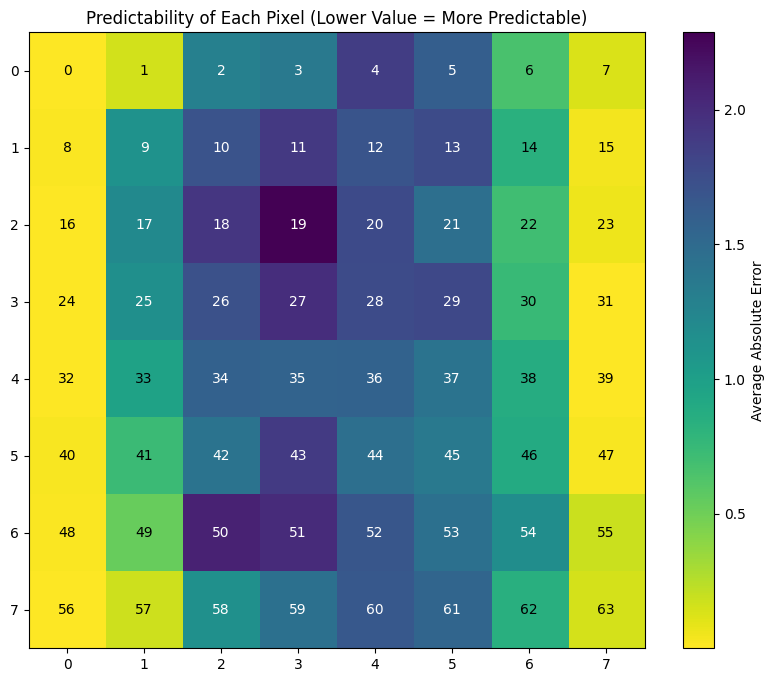

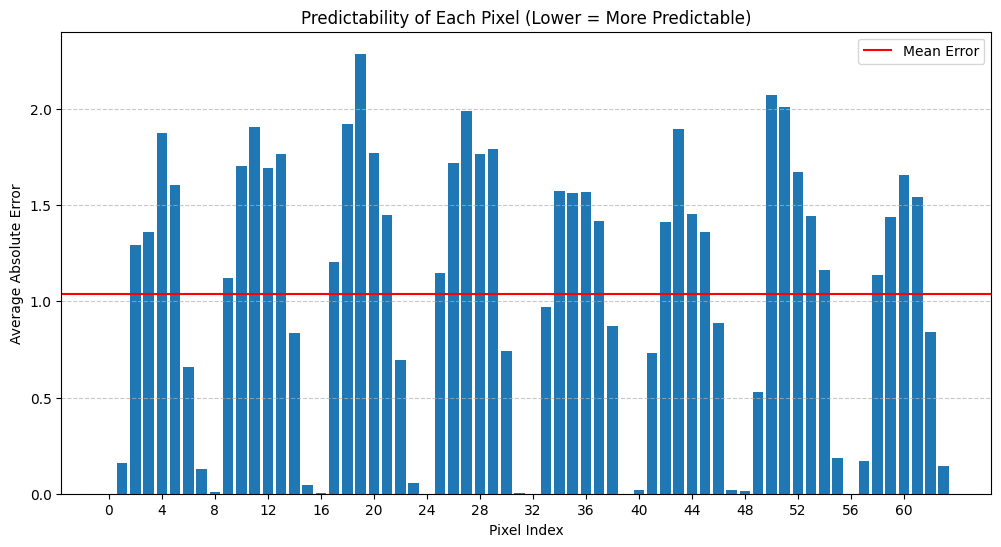

In [55]:
# Create a visualization of pixel predictability
pixel_errors_2d = np.array(all_pixel_errors).reshape(8, 8)

plt.figure(figsize=(10, 8))
plt.imshow(pixel_errors_2d, cmap='viridis_r')  # viridis_r so darker is less predictable
plt.colorbar(label='Average Absolute Error')
plt.title('Predictability of Each Pixel (Lower Value = More Predictable)')

# Add pixel indices as text in each cell
for i in range(8):
    for j in range(8):
        pixel_idx = i * 8 + j
        plt.text(j, i, str(pixel_idx), 
                 ha="center", va="center", 
                 color="white" if pixel_errors_2d[i, j] > np.mean(all_pixel_errors) else "black")

plt.savefig('pixel_predictability.png')
plt.show()

# Create a bar plot of all pixel errors
plt.figure(figsize=(12, 6))
plt.bar(range(64), all_pixel_errors)
plt.axhline(y=np.mean(all_pixel_errors), color='r', linestyle='-', label='Mean Error')
plt.xlabel('Pixel Index')
plt.ylabel('Average Absolute Error')
plt.title('Predictability of Each Pixel (Lower = More Predictable)')
plt.xticks(range(0, 64, 4))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('pixel_errors_bar.png')
plt.show()

Pixel 0 is the most predictable with an error of 0.0001, while pixel 19 is the least predictable with an error of 2.2874. The top-left corner pixel is highly predictable because it's consistently unused across digit samples, creating a pattern the model easily recognizes. Pixel 19's position in the middle region corresponds to an area where digits have maximum variation in their structural features, making it difficult for the model to predict based solely on surrounding pixels.RetryClaude can make mistakes. Please double-check responses.